In [1]:
import gzip
import glob
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Système étudié :
PMF='./pmf-data/'

#dropbox_file = '/home/bories/Dropbox/Dossier familial/Cour/Maîtrise Biochimie/Cours/Poster/052025/'

In [2]:
def free_energy(pKa, charge):
    R=8.314*10**(-3) #kJ/mol.K
    T=302.3545798089109 #K
    pH=7.0
    return -charge*R*T*np.log(10)*(pKa-pH)

def get_ref_per_acid(acid):
    #https://www.vanderbilt.edu/AnS/Chemistry/Rizzo/stuff/AA/AminoAcids.html
    # Pour la ref aux residus chargés
    neutrals=['SCHE', 'SCHD', 'SCKN', 'SCRN', 'SCDN', 'SCEN', 'SCC', 'SCY']
    pKas=[6.04, 6.04, 10.54, 12.48, 3.90, 4.07, 8.37, 10.46]
    charges=[1, 1, 1, 1, -1, -1, -1, -1]
    # Pour la ref aux résidus non-chargés
    #neutrals=['SCHP', 'SCKN', 'SCRN', 'SCDN', 'SCEN', 'SCCM', 'SCYM']
    #pKas=[6.04, 10.54, 12.48, 3.90, 4.07, 8.37, 10.46]
    #charges=[1, -1, -1, 1, 1, -1, -1]
    #dfref=extract_all_density(acid)
    #zero=stats_df['mean'].iloc[55]
    #zero=dfref['density{}{}'.format(traj, i)].values[55]+e #if per traj
    if acid in neutrals:
        zero_ref=free_energy(pKas[neutrals.index(acid)], charges[neutrals.index(acid)])
    else:
        zero_ref=0
    return zero_ref

def PMF_residue(acid):
    dfpmf=pd.read_table(PMF+f'pmf_{acid}.dat'.lower(), sep="\s+")
    return dfpmf


def get_interval_btw_PMF(ref, new, correction):
    DG = pd.DataFrame()
        
    # Boucle sur chacun des pmf (1 à 6)
    # pour tenir compte de toutes les différences d'énergies
    # pour le calcul du pKa
    for i in range(1, 7):
        mask_window = (ref["x"] >= 40) & (ref["x"] <= 50)
        baseline = ref[mask_window].mean()
        col_ref = ref[f'PMF_y{i}']-baseline[f'PMF_y{i}']
        for j in range(1, 7):
            mask_window = (new["x"] >= 40) & (new["x"] <= 50)
            baseline = new[mask_window].mean()
            col_new = new[f'PMF_y{j}']-baseline[f'PMF_y{i}']+correction
            DG[f'DG{i}-{j}'] = col_new-col_ref
    return DG



In [3]:
ref = PMF_residue('SCRN')
new = PMF_residue('SCR')
correction = get_ref_per_acid('SCR')
get_interval_btw_PMF(ref, new, correction)

,DG1-1,DG1-2,DG1-3,DG1-4,DG1-5,DG1-6,DG2-1,DG2-2,DG2-3,DG2-4,...,DG5-3,DG5-4,DG5-5,DG5-6,DG6-1,DG6-2,DG6-3,DG6-4,DG6-5,DG6-6
0,6.465741,6.255524,6.493214,5.940869,6.520205,5.997332,6.914295,6.704078,6.941768,6.389423,...,4.593689,4.041344,4.620680,4.097807,5.881109,5.670892,5.908582,5.356237,5.935573,5.412700
1,8.683484,8.473267,8.710957,8.158612,8.737948,8.215075,8.708687,8.498470,8.736160,8.183815,...,7.396842,6.844497,7.423833,6.900960,7.715706,7.505489,7.743179,7.190834,7.770170,7.247297
2,11.405631,11.195414,11.433104,10.880759,11.460095,10.937222,11.545449,11.335232,11.572922,11.020577,...,10.489894,9.937549,10.516885,9.994012,10.273262,10.063045,10.300735,9.748390,10.327726,9.804853
3,14.327595,14.117378,14.355068,13.802723,14.382059,13.859186,14.114997,13.904780,14.142470,13.590125,...,13.640948,13.088603,13.667939,13.145066,13.116515,12.906298,13.143988,12.591643,13.170979,12.648106
4,15.285971,15.145544,17.103911,14.871771,15.314626,14.901898,14.978833,14.838406,16.796773,14.564633,...,16.471603,14.239463,14.682318,14.269590,14.070300,13.929873,15.888240,13.656100,14.098955,13.686227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#source : https://www.vanderbilt.edu/AnS/Chemistry/Rizzo/stuff/AA/AminoAcids.html
#pKa : ARG 12.48, LYS 10.54, ASP 3.90, GLU 4.07, HIS 6.04, CYS 8.37
aa_name=['SCRN', 'SCR', 'SCKN', 'SCK', 'SCHE', 'SCHP',
         'SCDN', 'SCD', 'SCEN', 'SCE', 'SCC', 'SCCM', 'SCY', 'SCYM']

aa_symbol=['ARGN', 'ARG', 'LYSN', 'LYS', 'HSE', 'HIS',
           'ASPN', 'ASP', 'GLUN', 'GLU', 'CYSN', 'CYS', 'TYRN', 'TYR']

aa_charge=[0, 1, 0, 1, 0, 1, 0, -1, 0, -1, 0, -1, 0, -1]

df_e=pd.DataFrame([float(i) / 10 for i in range(5, 605, 10)], columns=['x'])
df_0=pd.DataFrame([float(i) / 10 for i in range(5, 605, 10)], columns=['x'])

def pKa(DG, charge):
    R=8.314*10**(-3) #kJ/mol.K
    T=302.3545798089109 #K
    pH=7.0
    return -DG/(charge*R*T*np.log(10))+pH

for i in range(len(aa_name)):
    acid=aa_name[i]
    all = PMF_residue(acid)
    acid_s=aa_symbol[i]
    charge=aa_charge[i]
    if i%2==0:
        ref = all
        correction = get_ref_per_acid(acid)
    else:
        new = all
        DG = get_interval_btw_PMF(ref, new, correction)
        print(DG)
        dpKa = DG.apply(lambda x: pKa(x, charge), axis=1)
        df_e['pKa_{}'.format(acid_s)]=dpKa.mean(axis=1)
        df_e['std_{}'.format(acid_s)]=dpKa.std(axis=1)/np.sqrt(dpKa.shape[1]) 

for i in range(len(aa_name)):
    acid=aa_name[i]
    all = PMF_residue(acid)
    mask_window = (all["y1_norm"] != 0) & (all["y2_norm"] != 0) & (all["y3_norm"] != 0) & (all["y4_norm"] != 0) & (all["y5_norm"] != 0) & (all["y6_norm"] != 0)
    all_0 = all[mask_window]
    acid_s=aa_symbol[i]
    charge=aa_charge[i]
    if i%2==0:
        ref=all_0
        correction = get_ref_per_acid(acid)
    else:
        new=all_0
        DG = get_interval_btw_PMF(ref, new, correction)
        dpKa=DG.apply(lambda x: pKa(x, charge), axis=1)
        df_0['pKa_{}'.format(acid_s)]=dpKa.mean(axis=1)
        df_0['std_{}'.format(acid_s)]=dpKa.std(axis=1)/np.sqrt(dpKa.shape[1]) 
#display(DG)
d2=df_e[df_e['x']>17]
d3=d2[d2['x']<29]

pd.set_option('display.max_rows', None)

display(d3)

        DG1-1      DG1-2      DG1-3      DG1-4      DG1-5      DG1-6  \
0  -25.253502 -25.463719 -25.226029 -25.778374 -25.199038 -25.721911   
1  -23.035759 -23.245976 -23.008286 -23.560631 -22.981295 -23.504168   
2  -20.313612 -20.523829 -20.286139 -20.838484 -20.259148 -20.782021   
3  -17.391648 -17.601865 -17.364175 -17.916520 -17.337184 -17.860057   
4  -16.433272 -16.573699 -14.615332 -16.847472 -16.404617 -16.817345   
..        ...        ...        ...        ...        ...        ...   
75        NaN        NaN        NaN        NaN        NaN        NaN   
76        NaN        NaN        NaN        NaN        NaN        NaN   
77        NaN        NaN        NaN        NaN        NaN        NaN   
78        NaN        NaN        NaN        NaN        NaN        NaN   
79        NaN        NaN        NaN        NaN        NaN        NaN   

        DG2-1      DG2-2      DG2-3      DG2-4  ...      DG5-3      DG5-4  \
0  -24.804948 -25.015165 -24.777475 -25.329820  ... -27.12

,x,pKa_ARG,std_ARG,pKa_LYS,std_LYS,pKa_HIS,std_HIS,pKa_ASP,std_ASP,pKa_GLU,std_GLU,pKa_CYS,std_CYS,pKa_TYR,std_TYR
17,17.5,12.239623,0.015719,10.395141,0.011706,6.263461,0.010797,6.110551,0.023910,6.120518,0.025809,10.259728,0.020594,12.831609,0.029382
18,18.5,12.347195,0.016015,10.464019,0.011649,6.339097,0.011172,5.651127,0.020003,5.724354,0.022193,9.720730,0.015452,12.474585,0.030450
19,19.5,12.444426,0.016545,10.507898,0.011986,6.356635,0.011522,5.207376,0.014087,5.347284,0.018860,9.203100,0.012748,12.097599,0.032305
20,20.5,12.518114,0.016097,10.522270,0.011139,6.293105,0.009499,4.810381,0.007415,4.987786,0.015231,8.748585,0.010524,11.707229,0.034263
21,21.5,12.535204,0.015846,10.488804,0.010097,6.175947,0.008178,4.506400,0.005503,4.703140,0.011783,8.416501,0.008399,11.313888,0.033806
22,22.5,12.461851,0.015580,10.419239,0.008997,6.061885,0.006543,4.287135,0.005667,4.488040,0.009356,8.211171,0.008335,10.990636,0.028242
23,23.5,12.341581,0.015555,10.347370,0.008395,5.978736,0.005340,4.115823,0.005387,4.325746,0.008491,8.121013,0.006613,10.762477,0.021914
24,24.5,12.228641,0.013975,10.297596,0.007200,5.921162,0.005357,3.988393,0.005623,4.200178,0.007351,8.083208,0.006116,10.604019,0.020904
25,25.5,12.151019,0.012705,10.270619,0.005636,5.889673,0.004814,3.894825,0.005282,4.105978,0.006396,8.078030,0.004915,10.508584,0.020250
26,26.5,12.125895,0.011068,10.272210,0.005273,5.882142,0.004722,3.834593,0.004751,4.040212,0.005571,8.097959,0.005959,10.453826,0.018376


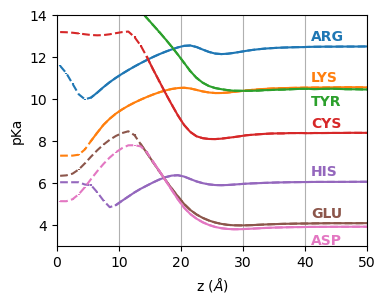

In [5]:
#plot
color = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=(4,3))
list=['ARG', 'LYS', 'TYR', 'CYS', 'HIS', 'GLU', 'ASP']

for i in range(len(list)):
    name=list[i]
    x1, y1, e1 = df_0['x'], df_0['pKa_{}'.format(name)], df_0['std_{}'.format(name)]
    x2, y2, e2 = df_e['x'], df_e['pKa_{}'.format(name)], df_e['std_{}'.format(name)]
    #print(x, y)
    plt.errorbar(x1, y1, e1, label=name, linewidth=1.5, color=color[i])
    plt.errorbar(x2, y2, e2, label=name, linewidth=1.5, color=color[i], linestyle='--')
    if name!='ASP' and name!='TYR':
        plt.text(41, y2.iloc[40]+0.3, name, weight="bold", color=color[i])
    else:
        plt.text(41, y2.iloc[40]-0.8, name, weight="bold", color=color[i])
#plt.legend(loc='lower right')
plt.grid(axis='x')
plt.xlim([0, 50])
plt.ylim([3, 14])
plt.xlabel('z ($\AA$)')
plt.ylabel('pKa')
#plt.legend()
#display(df_comp)
#dropbox_file = '/home/bories/Dropbox/Dossier familial/Cour/Maîtrise Biochimie/Cours/Poster/052025/'
plt.savefig('pKa.png', bbox_inches='tight', transparent=True)
plt.show()


In [ ]:


def pKa(DG, charge):
    R=8.314*10**(-3) #kJ/mol.K
    T=302.3545798089109 #K
    pH=7.0
    return -DG/(charge*R*T*np.log(10))+pH

#for traj in ['1', '2', '3']:
        #for i in range(2,6):

d=pd.DataFrame([float(i) / 10 for i in range(5, 605, 10)], columns=['x'])

for i in range(len(aa_name)):
    acid=aa_symbol[i]
    charge=aa_charge[i]
    if i%2==0:
        ref=df_e[acid]
    else:
        new=df_e[acid]
        DG=new-ref
        d['pKa_{}'.format(acid)]=pKa(DG,charge)
display(d)
#DG_wat=free_energy(pKa, charge)

KeyError: 'ARGN'